In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fitds.fit2df import parse

### Parse the Garmin Fit files downloaded from Zwift

In [2]:
df1 = parse("../data/2020-01-13-19-29-45.fit")
df2 = parse("../data/2020-01-18-15-04-18.fit")
df3 = parse("../data/2020-01-20-20-20-56.fit")

### Just take a quick look at some values and numbers

In [3]:
df1.head()

,altitude,cadence,compressed_speed_distance,cycle_length,distance,enhanced_altitude,enhanced_speed,grade,heart_rate,position_lat,position_long,power,resistance,speed,temperature,time_from_course,timestamp
0,2506,0,None,None,None,1.2,1.662,None,0,-138833729,1991786529,48,None,1662,None,None,2020-01-14 02:32:52
1,2506,0,None,None,None,1.2,2.119,None,0,-138833559,1991786638,49,None,2119,None,None,2020-01-14 02:32:53
2,2506,0,None,None,None,1.2,2.495,None,0,-138833348,1991786768,51,None,2495,None,None,2020-01-14 02:32:54
3,2506,0,None,None,None,1.2,2.811,None,0,-138833105,1991786917,50,None,2811,None,None,2020-01-14 02:32:55
4,2506,0,None,None,None,1.2,3.068,None,0,-138832824,1991787089,46,None,3068,None,None,2020-01-14 02:32:56


In [4]:
print("Max Power:", df1["power"].max())
print("Min Power:", df1["power"].min())
print("Avg Power:", df1["power"].mean())

Max Power: 264
Min Power: 0
Avg Power: 76.68008255933952


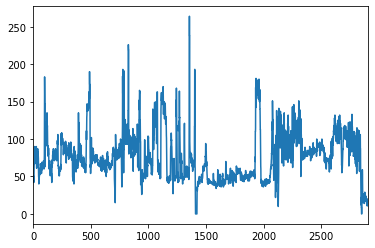

In [5]:
df1["power"].plot()

## Plot Power output comparison between rides

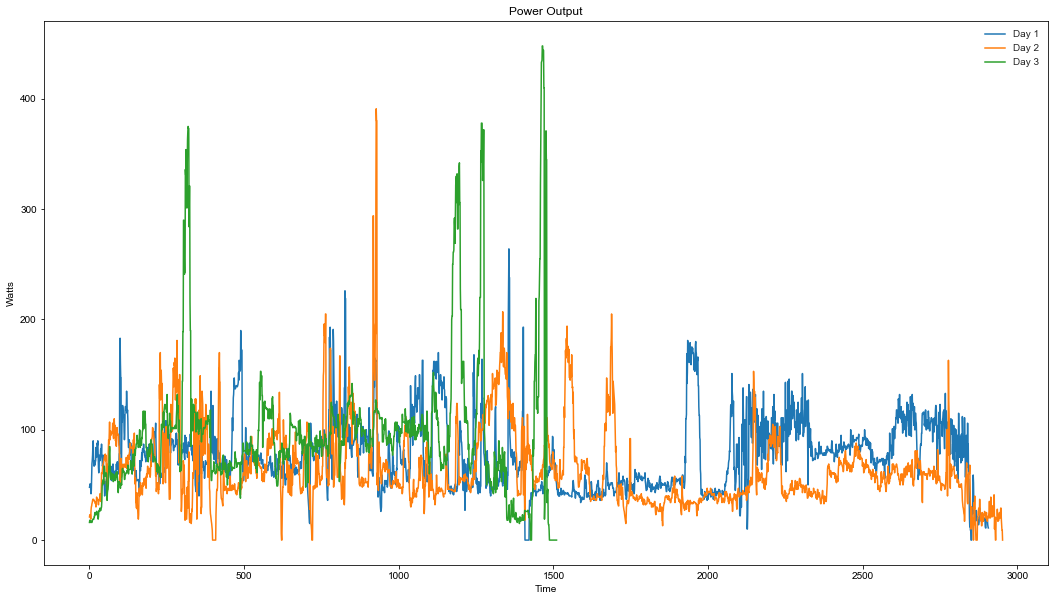

In [6]:
first_power = df1["power"].values
second_power = df2["power"].values
third_power = df3["power"].values

fig=plt.figure(figsize=(18, 10))
plt.plot(first_power, label="Day 1")
plt.plot(second_power, label="Day 2")
plt.plot(third_power, label="Day 3")
plt.title("Power Output")
plt.style.use('seaborn-darkgrid')
plt.xlabel("Time")
plt.ylabel("Watts")
palette = plt.get_cmap('Set1')
plt.legend()
plt.show()

### Cleaning Things Up
Each data point is an instantaneous measurement of the power output. In reality, the output is more consistent, but things like measurement error, sample rate, etc can make the data look more varible than it is. Plus it doesn't make for a very good looking graph. When there is so much movement in the data, the graph will be hard to interpret. We can clean things up with some smoothing.

In [7]:
# Window span
span = 25
sma = df1["power"].rolling(window=span, min_periods=span).mean()[:span]
rest = df1["power"][span:]
test = pd.concat([sma, rest]).ewm(span=span, adjust=False).mean()

In the above, we use an exponentially-weighted moving average that has a window of 25 sample points. This results in the following plot for day 1.

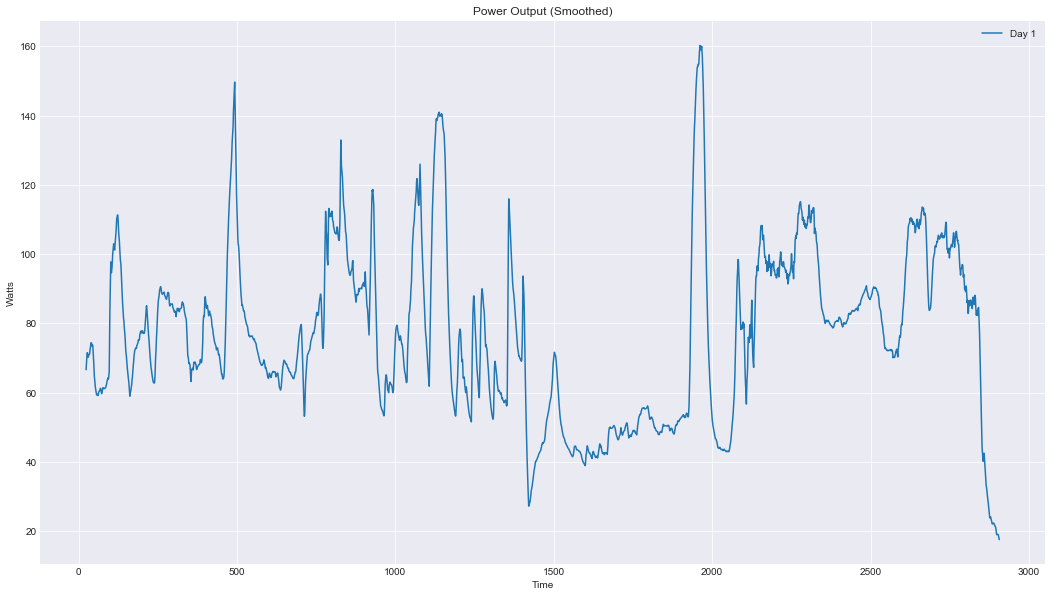

In [8]:
fig=plt.figure(figsize=(18, 10))
plt.plot(test, label="Day 1")
plt.title("Power Output (Smoothed)")
plt.style.use('seaborn-darkgrid')
plt.xlabel("Time")
plt.ylabel("Watts")
palette = plt.get_cmap('Set1')
plt.legend()
plt.show()

Smoothing has a side-effect. Notice how the maximum (and minimum) values are not the same. So those legitimate short bursts of power are gone. Adjusting the span could bring those back, however the smaller the span the more jittery the data will be. Ok, let's put this all in a function and use it on the rest of our rides.

In [9]:
def smooth(data, column, window_span=25):
    ma = data[column].rolling(window=window_span, min_periods=window_span).mean()[:window_span]
    rest = data[column][window_span:]
    smoothed_df = pd.concat([sma, rest]).ewm(span=window_span, adjust=False).mean()
    smoothed_df = smoothed_df.fillna(value=0.0)
    return smoothed_df.values

In [10]:
smoothed_power1 = smooth(df1, "power")
smoothed_power2 = smooth(df2, "power")
smoothed_power3 = smooth(df3, "power")

Now plot out the new power graph

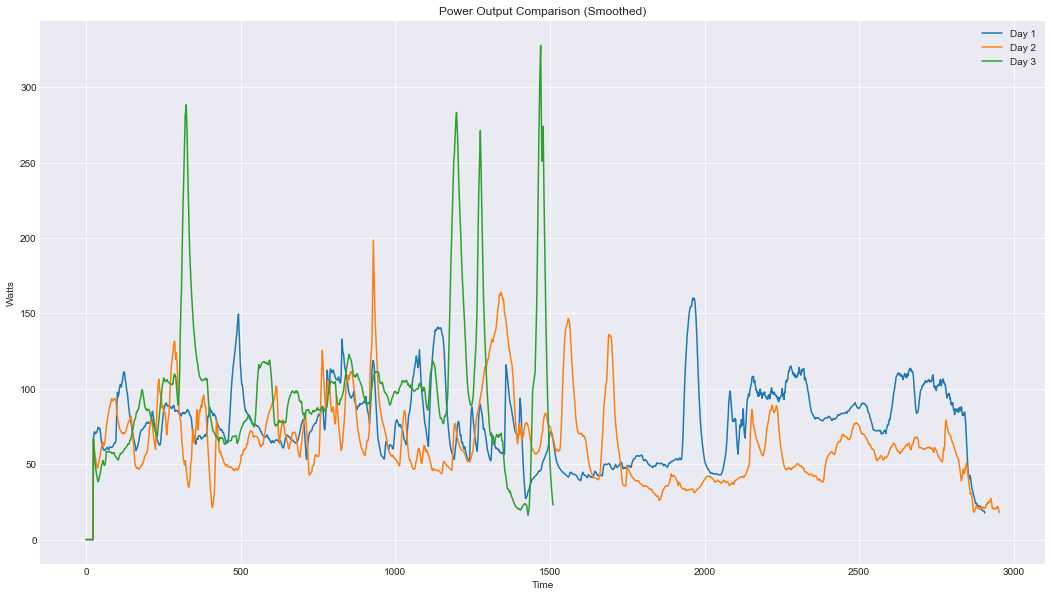

In [15]:
fig=plt.figure(figsize=(18, 10))
plt.plot(smoothed_power1, label="Day 1")
plt.plot(smoothed_power2, label="Day 2")
plt.plot(smoothed_power3, label="Day 3")
plt.title("Power Output Comparison (Smoothed)")
plt.style.use('seaborn-darkgrid')
plt.xlabel("Time")
plt.ylabel("Watts")
palette = plt.get_cmap('Set1')
plt.legend()
plt.show()